In [1]:
options(warn=-1)
library(dplyr)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



# Naive Bayes
**Naive Bayes est un algorithme d'apprentissage automatique supervisé basé sur le théorème de Bayes qui est utilisé pour résoudre des problèmes de classification en suivant une approche probabiliste.
Il est basé sur l'idée que les variables prédictives d'un modèle d'apprentissage automatique sont indépendantes les unes des autres. Cela signifie que le résultat d'un modèle dépend d'un ensemble de variables indépendantes qui n'ont rien à voir les unes avec les autres.**
<br>
### Mais pourquoi Bayes est-il appelé "Naïf" ?
**Dans les problèmes du monde réel, les variables prédicteurs ne sont pas toujours indépendantes les unes des autres, il y a toujours des corrélations entre elles. Puisque Naive Bayes considère que chaque variable prédictive est indépendante de toute autre variable du modèle, il est appelée "Naïf".**
<br>
### Les mathématiques derrière le Naive Bayes
**Le principe derrière Naive Bayes est le théorème de Bayes, également connu sous le nom de règle de Bayes. Le théorème de Bayes est utilisé pour calculer la probabilité conditionnelle, qui n'est rien d'autre que la probabilité qu'un événement se produise sur la base d'informations sur les événements du passé. Mathématiquement, le théorème de Bayes est représenté comme suit:**

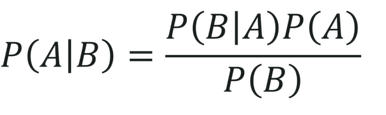

    A is known as the proposition and B is the evidence
    P(A) represents the prior probability of the proposition
    P(B) represents the prior probability of evidence
    P(A|B) is called the posterior
    P(B|A) is the likelihood

In [2]:
#Reading data into R
data<- read.csv("C:/Users/achra/Downloads/diabetes.csv")

In [3]:
str(data)

'data.frame':	768 obs. of  9 variables:
 $ Pregnancies             : int  6 1 8 1 0 5 3 10 2 8 ...
 $ Glucose                 : int  148 85 183 89 137 116 78 115 197 125 ...
 $ BloodPressure           : int  72 66 64 66 40 74 50 0 70 96 ...
 $ SkinThickness           : int  35 29 0 23 35 0 32 0 45 0 ...
 $ Insulin                 : int  0 0 0 94 168 0 88 0 543 0 ...
 $ BMI                     : num  33.6 26.6 23.3 28.1 43.1 25.6 31 35.3 30.5 0 ...
 $ DiabetesPedigreeFunction: num  0.627 0.351 0.672 0.167 2.288 ...
 $ Age                     : int  50 31 32 21 33 30 26 29 53 54 ...
 $ Outcome                 : int  1 0 1 0 1 0 1 0 1 1 ...


In [4]:
head(data)

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0


In [5]:
#install.packages('psych')
library(psych)
describe(data)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
Pregnancies,1,768,3.8450521,3.3695781,3.0000,3.4610390,2.9652000,0.000,17.00,17.000,0.8981549,0.1421840,0.12158918
Glucose,2,768,120.8945312,31.9726182,117.0000,119.3798701,29.6520000,0.000,199.00,199.000,0.1730754,0.6193695,1.15371248
BloodPressure,3,768,69.1054688,19.3558072,72.0000,71.3571429,11.8608000,0.000,122.00,122.000,-1.8364126,5.1175100,0.69844253
SkinThickness,4,768,20.5364583,15.9522176,23.0000,19.9366883,17.7912000,0.000,99.00,99.000,0.1089456,-0.5309369,0.57562607
Insulin,5,768,79.7994792,115.2440024,30.5000,56.7451299,45.2193000,0.000,846.00,846.000,2.2633826,7.1331349,4.15850974
BMI,6,768,31.9925781,7.8841603,32.0000,31.9592532,6.8199600,0.000,67.10,67.100,-0.4273073,3.2449627,0.28449513
DiabetesPedigreeFunction,7,768,0.4718763,0.3313286,0.3725,0.4215536,0.2483355,0.078,2.42,2.342,1.9124179,5.5285389,0.01195579
Age,8,768,33.2408854,11.7602315,29.0000,31.5438312,10.3782000,21.000,81.00,60.000,1.1251880,0.6217269,0.42436080
Outcome,9,768,0.3489583,0.4769514,0.0000,0.3116883,0.0000000,0.000,1.00,1.000,0.6325383,-1.6019762,0.01721050


#### Data Cleaning

En analysant la structure du dataset, nous pouvons constater que les valeurs minimales pour le glucose, la tension artérielle, la maladie de la peau, l'insuline et l'IMC sont toutes égales à zéro. Ce n'est pas l'idéal puisque personne ne peut avoir une valeur nulle pour le glucose, la pression sanguine, etc. C'est pourquoi ces valeurs sont considérées comme des observations manquantes.

In [6]:
#Convert '0' values into NA
data[, 2:7][data[, 2:7] == 0] <- NA

In [7]:
data <- na.omit(data)

#### EDA

Maintenant, effectuons quelques visualisations pour mieux examiner chaque variable. Cette étape est essentielle pour comprendre la signification de chaque variable prédictive.

corrplot 0.84 loaded


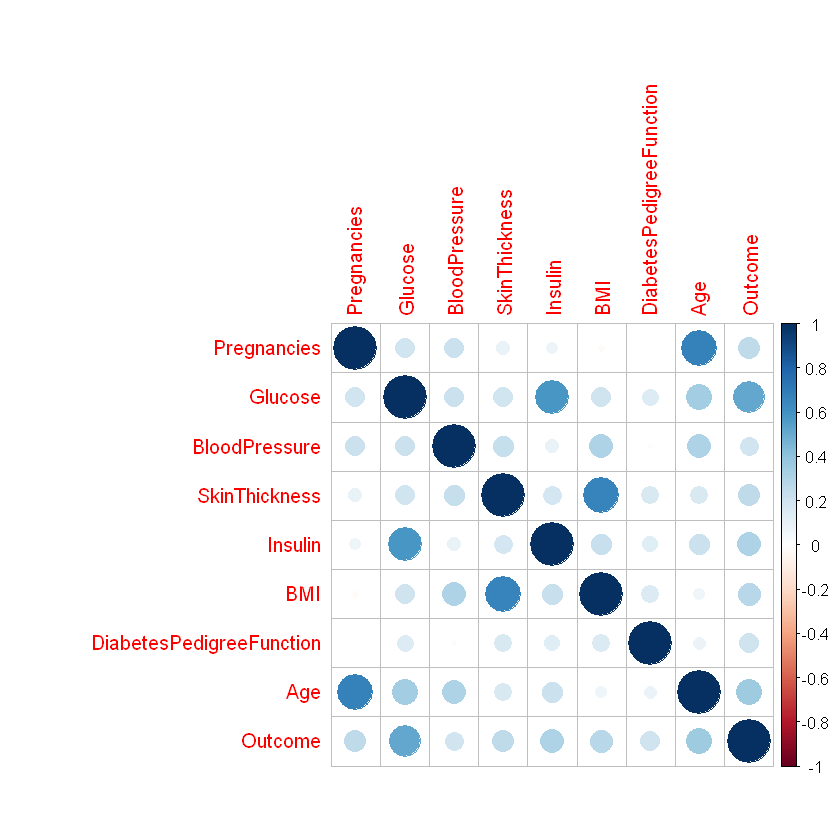

In [8]:
library(corrplot)

data %>% 
    select_if(is.numeric) %>% 
    cor() %>% 
    corrplot::corrplot()

Avant d'étudier le dataset, convertissons la variable de sortie ("Outcome") en une variable catégorielle. Ceci est nécessaire car notre sortie se présentera sous la forme de 2 classes, Vrai ou Faux. Vrai signifie qu'un patient est diabétique et Faux signifie qu'une personne n'est pas diabétique.

In [9]:
#Setting outcome variables as categorical
data$Outcome <- factor(data$Outcome, levels = c(0,1), labels = c("False", "True"))

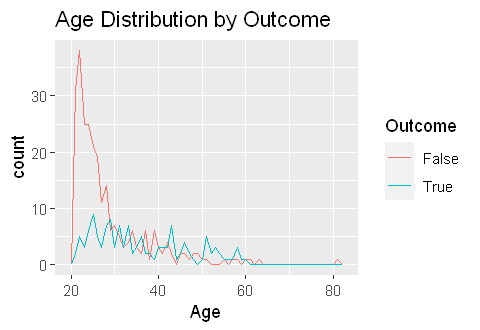

In [32]:
library(ggplot2)
library(repr)

options(repr.plot.width = 4, repr.plot.height = 2.75)
ggplot(data, aes(Age, colour = Outcome)) +
geom_freqpoly(binwidth = 1) + labs(title="Age Distribution by Outcome")

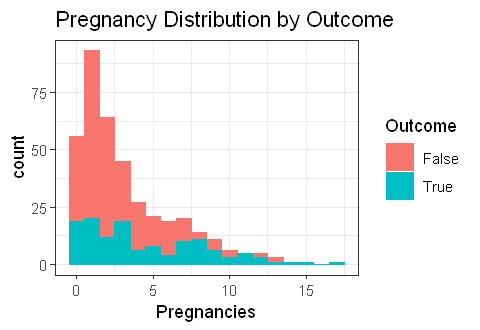

In [11]:
c <- ggplot(data, aes(x=Pregnancies, fill=Outcome, color=Outcome)) +
geom_histogram(binwidth = 1) + labs(title="Pregnancy Distribution by Outcome")
c + theme_bw()

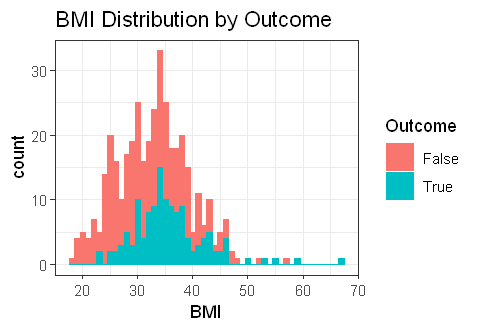

In [12]:
P <- ggplot(data, aes(x=BMI, fill=Outcome, color=Outcome)) +
geom_histogram(binwidth = 1) + labs(title="BMI Distribution by Outcome")
P + theme_bw()

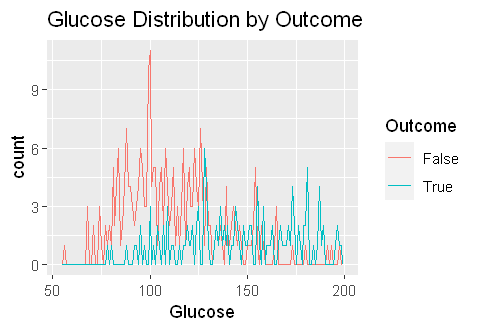

In [13]:
ggplot(data, aes(Glucose, colour = Outcome)) +
geom_freqpoly(binwidth = 1) + labs(title="Glucose Distribution by Outcome")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


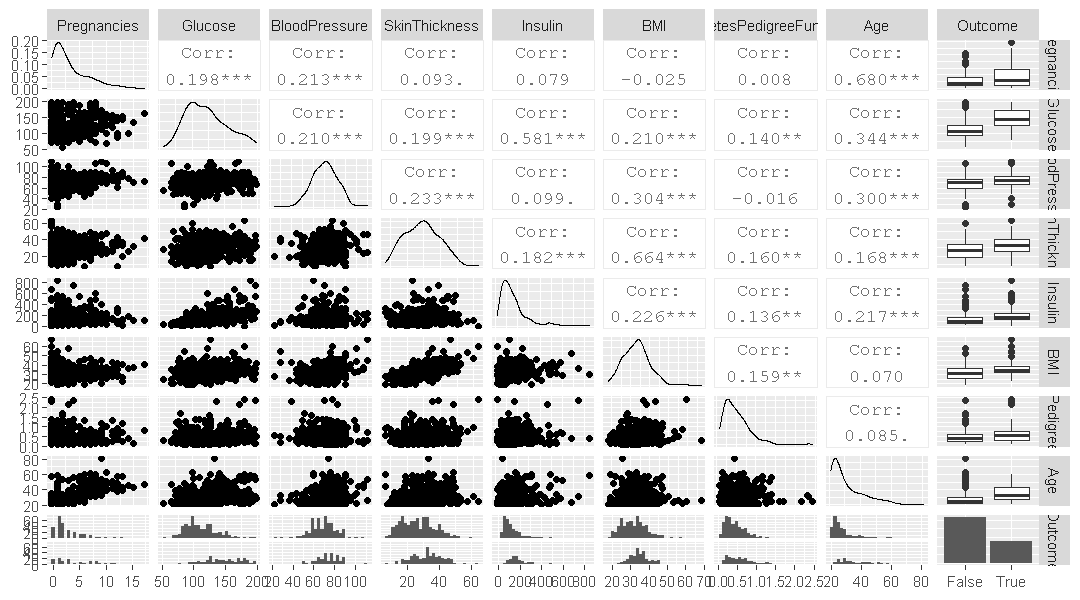

In [31]:
library(GGally)
options(repr.plot.width = 9, repr.plot.height = 5)
ggpairs(data)

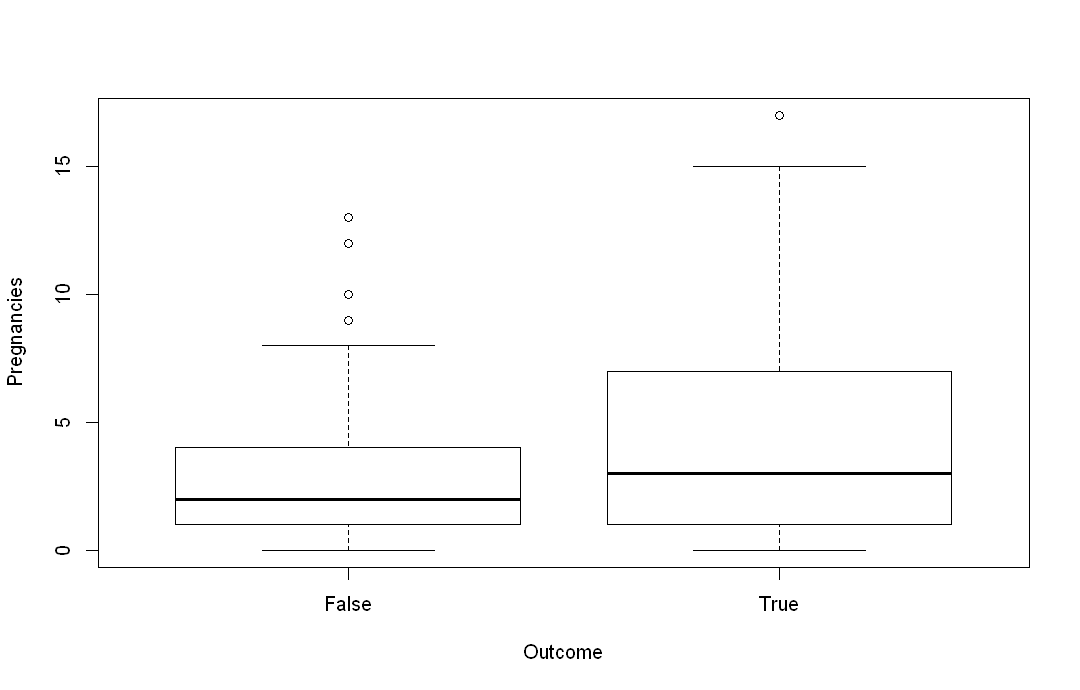

In [29]:
# Boxplot of Pregnancies and outcome
boxplot(Pregnancies~Outcome,data=data,
   xlab="Outcome", ylab="Pregnancies")

#### Data modeling

Cette étape commence par un processus appelé "Data Splitting", dans lequel le dataset est divisé en deux parties :

    Training : Cette partie est utilisée pour construire et former le modèle Machine Learning.
    Testing : Cette partie est utilisée pour évaluer l'efficacité du modèle.

In [ ]:
library(rsample)
# Create training (70%) and test (30%) sets for the attrition data.
# Use set.seed for reproducibility
set.seed(123)
split <- initial_split(data, prop = .7, strata = "Outcome")
training <- training(split)
testing  <- testing(split)

#Check dimensions of the split > 
prop.table(table(data$Outcome)) * 100 # *100 to get in percentage 

In [ ]:
prop.table(table(training$Outcome)) * 100

In [ ]:
prop.table(table(testing$Outcome)) * 100

In [ ]:
head(training)

In [ ]:
names(training)

In [ ]:
training %>% 
    select(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age) %>% 
    gather(metric, value) %>% 
    ggplot(aes(value, fill = metric)) + 
    geom_density(show.legend = FALSE) + 
    facet_wrap(~ metric, scales = "free")

In [ ]:
#load e1071 library and invoke naiveBayes method
library(e1071)
nb_model <- naiveBayes(Outcome~.,data = training)

In [ ]:
nb_test_predict <- predict(nb_model,testing[,-1])

In [ ]:
#confusion matrix
table_mat <- table(pred=nb_test_predict,true=testing$Outcome)
table_mat

In [ ]:
# sum(diag(table_mat)): Sum of the diagonal ; sum(table_mat): Sum of the matrix.
accuracy_Test <- sum(diag(table_mat)) / sum(table_mat)

In [ ]:
print(paste('Accuracy for test', accuracy_Test))

### Example using caret~naivebayes

Caret give to Naive Bayes algorithm the possibility tu fine tune hyperparameters to get that extra better accuracy

In [ ]:
library(caret, quietly = TRUE)
library(naivebayes)

In [ ]:
# Train the Naive Bayes model with the Caret package
naive_bayes_via_caret <- train(Outcome ~ ., 
                               data = training,
                               method = "naive_bayes")

In [ ]:
# Classification
head(predict(naive_bayes_via_caret, newdata = testing))

In [ ]:
head(predict(naive_bayes_via_caret, newdata = testing, type = "prob"))

In [ ]:
## Recover the naive_bayes object
nb_object <- naive_bayes_via_caret$finalModel
class(nb_object)

In [ ]:
# Define tuning grid 
nb_grid <- expand.grid(usekernel = c(TRUE, FALSE),
                       laplace = c(0, 0.5, 1),
                       adjust = c(0.75, 1, 1.25, 1.5))

**laplace** : rajoute 1 à la combinaison de facteurs qui ne se passent jamais, faire varier ce parametre améliore la puissance de prédiction du model.

**adjust** : la bandwidth, input du KDE, utilisé uniquement quand usekernel est TRUE. La bandwidth en KDE represente la quantité de disperssion dans la KDE kernel function.

**KDE** : Kernel density estimation, méthode non-paramétrique d’estimation de la densité de probabilité d’une variable aléatoire. Elle se base sur un échantillon d’une population statistique et permet d’estimer la densité en tout point du support. En ce sens, cette méthode généralise astucieusement la méthode d’estimation par un histogramme. 

In [ ]:
# Fit the Naive Bayes model 
set.seed(2550)
naive_bayes_via_caret2 <- train(Outcome ~ ., data = training,
                               method = "naive_bayes",
                               tuneGrid = nb_grid)

In [ ]:
# Selected tuning parameters
naive_bayes_via_caret2$finalModel$tuneValue

In [ ]:
# Visualize the tuning process
plot(naive_bayes_via_caret2)

In [ ]:
# Perform classification 
head(predict(naive_bayes_via_caret2, newdata = testing))

In [ ]:
nb_test_predict <- predict(naive_bayes_via_caret2, newdata = testing)

In [ ]:
#confusion matrix
table_mat <- table(pred=nb_test_predict,true=testing$Outcome)
table_mat

In [ ]:
accuracy_Test <- sum(diag(table_mat)) / sum(table_mat)

In [ ]:
print(paste('Accuracy for test', accuracy_Test))